In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/Users/matylo/Documents/Reporting-Projet-Annuel/alcrowd/alcrowd_cleaned.csv")

# Trouver les 3000 premiers pid (tri√©s)
first_3000_pids = sorted(df['pid'].unique())[:3000]

# Filtrer les morceaux qui appartiennent √† ces playlists
df_3000 = df[df['pid'].isin(first_3000_pids)].copy()

In [4]:
df_3000

name  collaborative   pid modified_at  num_tracks  \
0          Throwbacks          False     0  2017-04-29          52   
1          Throwbacks          False     0  2017-04-29          52   
2          Throwbacks          False     0  2017-04-29          52   
3          Throwbacks          False     0  2017-04-29          52   
4          Throwbacks          False     0  2017-04-29          52   
...               ...            ...   ...         ...         ...   
199869  Starting Over          False  2999  2014-12-13          71   
199870  Starting Over          False  2999  2014-12-13          71   
199871  Starting Over          False  2999  2014-12-13          71   
199872  Starting Over          False  2999  2014-12-13          71   
199873  Starting Over          False  2999  2014-12-13          71   

        num_albums  num_followers  num_edits  playlist_duration_ms  \
0               47              1          6              11532414   
1               47              1          6              11532414   
2               47              1          6              11532414   
3               47              1          6              11532414   
4               47              1          6              11532414   
...            ...            ...        ...                   ...   
199869          67              1         28              16304259   
199870          67              1         28              16304259   
199871          67              1         28              16304259   
199872          67              1         28              16304259   
199873          67              1         28              16304259   

        num_artists  pos        artist_name  \
0                37    0      Missy Elliott   
1                37    1     Britney Spears   
2                37    2            Beyonc√©   
3                37    3  Justin Timberlake   
4                37    4             Shaggy   
...             ...  ...                ...   
199869           62   66     Dominic Cooper   
199870           62   67         Mikky Ekko   
199871           62   68     Brandi Carlile   
199872           62   69       Doom & Gloom   
199873           62   70            Badwolf   

                                   track_uri  \
0       spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1       spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
2       spotify:track:0WqIKmW4BTrj3eJFmnCKMv   
3       spotify:track:1AWQoqb9bSvzTjaLralEkT   
4       spotify:track:1lzr43nnXAijIGYnCT8M8H   
...                                      ...   
199869  spotify:track:2sxi3UJLbsIs6p281rARgi   
199870  spotify:track:3D1Kbd2pAO9chkd5aEP6q5   
199871  spotify:track:2zPaWxKdwaro3UmZ6ZVwfA   
199872  spotify:track:4P75K3ruHef0eP6GSJkncx   
199873  spotify:track:4W2YvWV0FuRnqPqnu9AlDf   

                                   artist_uri  \
0       spotify:artist:2wIVse2owClT7go1WT98tk   
1       spotify:artist:26dSoYclwsYLMAKD3tpOr4   
2       spotify:artist:6vWDO969PvNqNYHIOW5v0m   
3       spotify:artist:31TPClRtHm23RisEBtV3X7   
4       spotify:artist:5EvFsr3kj42KNv97ZEnqij   
...                                       ...   
199869  spotify:artist:0F6wZIBwxstvRk9eQtpvOo   
199870  spotify:artist:1buzCmyYZE4kcdLRudsb8V   
199871  spotify:artist:2sG4zTOLvjKG1PSoOyf5Ej   
199872  spotify:artist:61l8LBmASmaPsm0q7rQF2i   
199873  spotify:artist:0auMOIcp6l7WqNOuBOwDcO   

                                               track_name  \
0              Lose Control (feat. Ciara & Fat Man Scoop)   
1                                                   Toxic   
2                                           Crazy In Love   
3                                          Rock Your Body   
4                                            It Wasn't Me   
...                                                   ...   
199869  Lay All Your Love On Me - From "Mamma Mia!" So...   
199870                                     Mourning Doves   
199871                                Touching the Gro

In [5]:
df_3000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199874 entries, 0 to 199873
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   name                  199874 non-null  object
 1   collaborative         199874 non-null  bool  
 2   pid                   199874 non-null  int64 
 3   modified_at           199874 non-null  object
 4   num_tracks            199874 non-null  int64 
 5   num_albums            199874 non-null  int64 
 6   num_followers         199874 non-null  int64 
 7   num_edits             199874 non-null  int64 
 8   playlist_duration_ms  199874 non-null  int64 
 9   num_artists           199874 non-null  int64 
 10  pos                   199874 non-null  int64 
 11  artist_name           199874 non-null  object
 12  track_uri             199874 non-null  object
 13  artist_uri            199874 non-null  object
 14  track_name            199874 non-null  object
 15  album_uri             

In [6]:
df_3000.describe()

pid     num_tracks     num_albums  num_followers  \
count  199874.000000  199874.000000  199874.000000  199874.000000   
mean     1492.680669     109.521919      77.979622       2.836127   
std       861.064070      62.674696      47.393599      47.537377   
min         0.000000       5.000000       2.000000       1.000000   
25%       743.000000      56.000000      40.000000       1.000000   
50%      1487.000000     100.000000      70.000000       1.000000   
75%      2234.000000     158.000000     110.000000       2.000000   
max      2999.000000     247.000000     229.000000    2699.000000   

           num_edits  playlist_duration_ms    num_artists            pos  \
count  199874.000000          1.998740e+05  199874.000000  199874.000000   
mean       28.191756          2.550058e+07      57.887704      54.260959   
std        28.677040          1.474878e+07      36.894548      48.050824   
min         2.000000          9.238790e+05       3.000000       0.000000   
25%         7.000000          1.309232e+07      30.000000      17.000000   
50%        18.000000          2.337600e+07      51.000000      40.000000   
75%        39.000000          3.621548e+07      78.000000      79.000000   
max       178.000000          6.920024e+07     187.000000     246.000000   

       track_duration_ms  
count       1.998740e+05  
mean        2.334157e+05  
std         7.086663e+04  
min         0.000000e+00  
25%         1.980530e+05  
50%         2.245730e+05  
75%         2.577860e+05  
max         4.788938e+06

## Hypoth√®se
Un album est rarement repr√©sent√© par plus de 2 morceaux dans une playlist

### ACP

In [7]:
# Construction de la matrice playlist √ó album
pivot_df_3000 = df_3000.pivot_table(index='pid', columns='album_name', values='track_uri', aggfunc='count', fill_value=0)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df_3000)

In [8]:
# Instanciation de l'objet PCA
pca = PCA()

# Application de l'ACP
X_pca = pca.fit_transform(X_scaled)

# Extraction des variances expliqu√©es
explained_variance = pca.explained_variance_ratio_
#print(explained_variance)
cumulative_variance = explained_variance.cumsum()
#print(cumulative_variance)

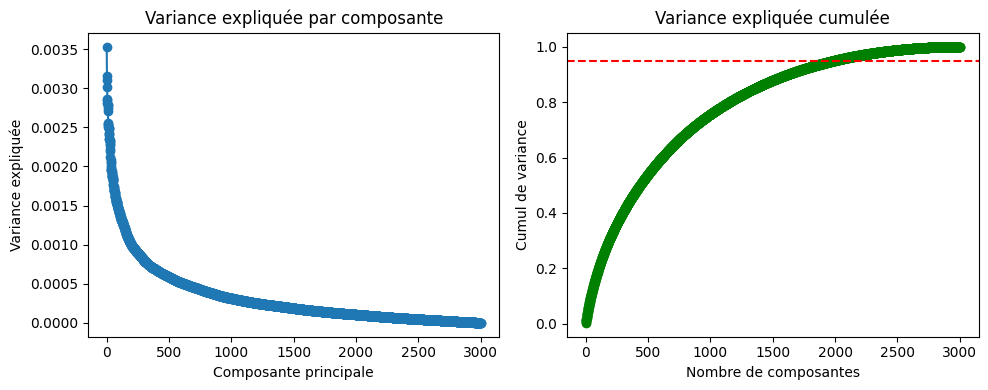

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Variance expliqu√©e par composante
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Variance expliqu√©e par composante")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliqu√©e")

# Variance cumul√©e
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.axhline(0.95, color='red', linestyle='--')
plt.title("Variance expliqu√©e cumul√©e")
plt.xlabel("Nombre de composantes")
plt.ylabel("Cumul de variance")

plt.tight_layout()
plt.show()

Les premi√®res composantes expliquent un peu plus de 0,3 % de la variance (soit tr√®s peu). De plus, La courbe d√©cro√Æt rapidement : il y a beaucoup de composantes, mais chacune apporte peu d'information.

On peut en conclure qu'aucune composante individuelle n'explique une part significative de la variance.
L'information est tr√®s dilu√©e entre les dimensions ‚Üí pas de structure dominante.

Variance expliqu√©e cumul√©e
Il faut conserver ~2000 composantes pour expliquer 95 % de la variance.
Cela veut dire que les playlists sont tr√®s diverses, aucune structure simple ne permet de les repr√©senter en peu de dimensions.

Ce r√©sultat pourrait confirmer notre hypoth√®se selon laquelle un album est rarement repr√©sent√© par plus de 2 morceaux dans une playlist car les 2000 composantes pour expliquer 95 % de la variance sugg√®rent une tr√®s grande diversit√© d‚Äôalbums dans les playlists.

K-means serait peut √™tre plus adapt√© au jeu de donn√©es.

### K-means

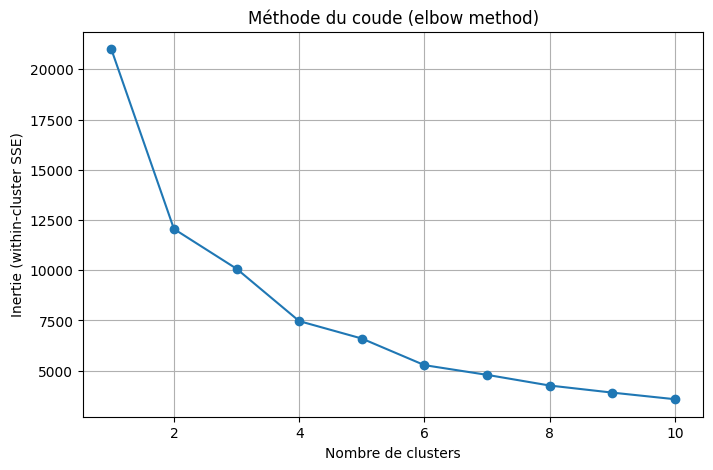

In [11]:
# 1. Calcul de la variable max_tracks_per_album (nombre maximum de morceaux provenant du m√™me album dans la playlist)
max_per_album = df_3000.groupby(['pid', 'album_name']).size().reset_index(name='count')
max_tracks_per_album = max_per_album.groupby('pid')['count'].max().reset_index(name='max_tracks_per_album')

# 2. Agr√©gation des autres infos playlist
playlist_features = df_3000.groupby('pid').agg({
    'num_tracks': 'first',
    'num_albums': 'first',
    'num_artists': 'first',
    'num_followers': 'first',
    'num_edits': 'first',
    'playlist_duration_ms': 'first'
}).reset_index()

# 3. Fusion de la variable max_tracks_per_album
playlist_df = pd.merge(playlist_features, max_tracks_per_album, on='pid')

# 4. S√©lection des variables pour le clustering (inclut maintenant l‚Äôhypoth√®se)
features = ['num_tracks', 'num_albums', 'num_artists', 'num_followers', 
            'num_edits', 'playlist_duration_ms', 'max_tracks_per_album']
X = playlist_df[features]

# 5. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. M√©thode du coude
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Trac√© de la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (within-cluster SSE)')
plt.title("M√©thode du coude (elbow method)")
plt.grid(True)
plt.show()


In [12]:
#k optimal = 4
kmeans = KMeans(n_clusters=4, random_state=42)
playlist_df['cluster'] = kmeans.fit_predict(X_scaled)

/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2697006595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='cluster', y='max_tracks_per_album', data=playlist_df, jitter=0.3, alpha=0.6, palette='Set2')


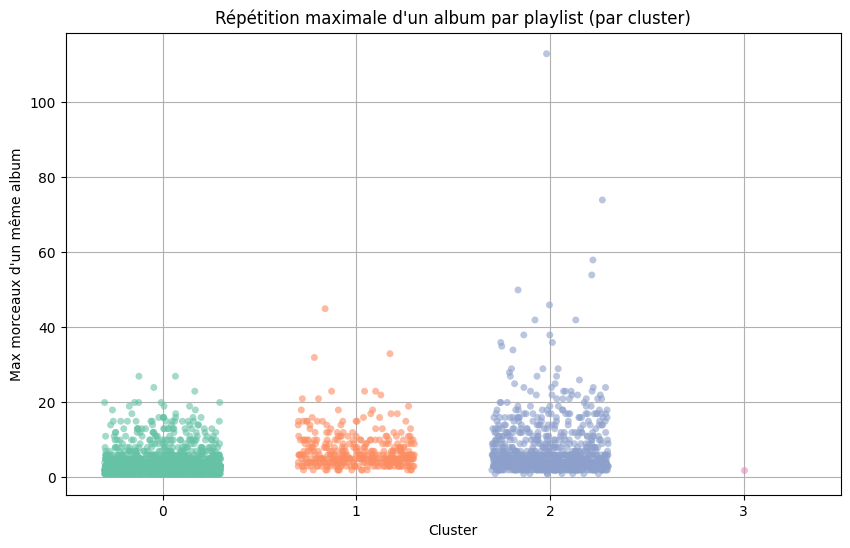

In [14]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='cluster', y='max_tracks_per_album', data=playlist_df, jitter=0.3, alpha=0.6, palette='Set2')
plt.title("R√©p√©tition maximale d'un album par playlist (par cluster)")
plt.xlabel("Cluster")
plt.ylabel("Max morceaux d'un m√™me album")
plt.grid(True)
plt.show()

Clusters 0 et 1 : majorit√© des points ‚â§ 10 ‚Üí les playlists de ces groupes peuvent confirmer l'hypoth√®se.
Cluster 2 : dispersion plus large, quelques points d√©passent 20, 40, 60, jusqu'√† 100 morceaux du m√™me album ‚Üí forte r√©p√©tition dans certaines playlists ‚Üí contredit partiellement l‚Äôhypoth√®se pour ce groupe.
Cluster 3 : un seul point (cas extr√™me isol√© ?), avec r√©p√©tition de 2 morceaux ‚Üí coh√©rent avec l‚Äôhypoth√®se.

En conclusion, on peut consid√©rer que l'hypoth√®se est v√©rifi√©e car elle reste valide dans la plupart des cas.

## Visualisation

Text(0.5, 0, 'Albums diff√©rents')

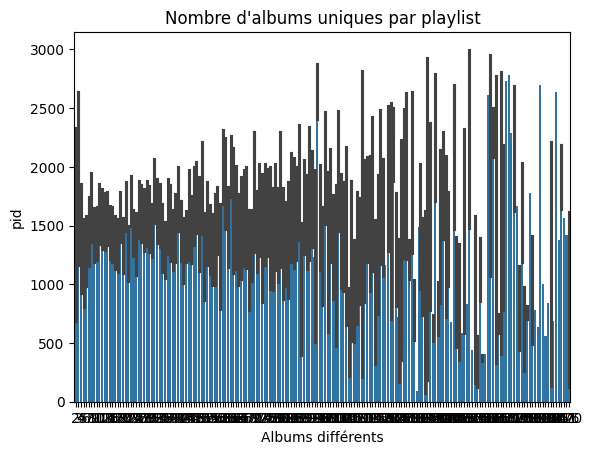

In [21]:
albums_per_playlist = df_3000.groupby('pid')['album_name'].nunique()
#sns.histplot(albums_per_playlist, bins=30)
sns.barplot(y=albums_per_playlist.index, x=albums_per_playlist.values)
plt.title("Nombre d'albums uniques par playlist")
plt.xlabel("Albums diff√©rents")

In [17]:
albums_per_playlist = df.groupby('pid')['album_name'].nunique()
print(albums_per_playlist)
print(albums_per_playlist.index)

pid
0        44
1        23
2        51
3       107
4        16
       ... 
9995     25
9996     45
9997     24
9998     12
9999     41
Name: album_name, Length: 10000, dtype: int64
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', name='pid', length=10000)


In [25]:
# Nombre de playlists diff√©rentes par artiste
artist_playlist_counts = df_3000.groupby('artist_name')['pid'].nunique().sort_values(ascending=False).head(3)

print("üé§ Top 3 artistes pr√©sents dans le plus grand nombre de playlists :")
print(artist_playlist_counts)

üé§ Top 3 artistes pr√©sents dans le plus grand nombre de playlists :
artist_name
Drake         583
Rihanna       448
The Weeknd    404
Name: pid, dtype: int64


In [26]:
# Nombre de playlists diff√©rentes par album
album_playlist_counts = df_3000.groupby('album_name')['pid'].nunique().sort_values(ascending=False).head(3)

print("\nüíø Top 3 albums pr√©sents dans le plus grand nombre de playlists :")
print(album_playlist_counts)


üíø Top 3 albums pr√©sents dans le plus grand nombre de playlists :
album_name
Greatest Hits    288
Views            286
Stoney           267
Name: pid, dtype: int64


/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2430918082.py:36: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/matylo/.pyenv/versions/my_ml_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


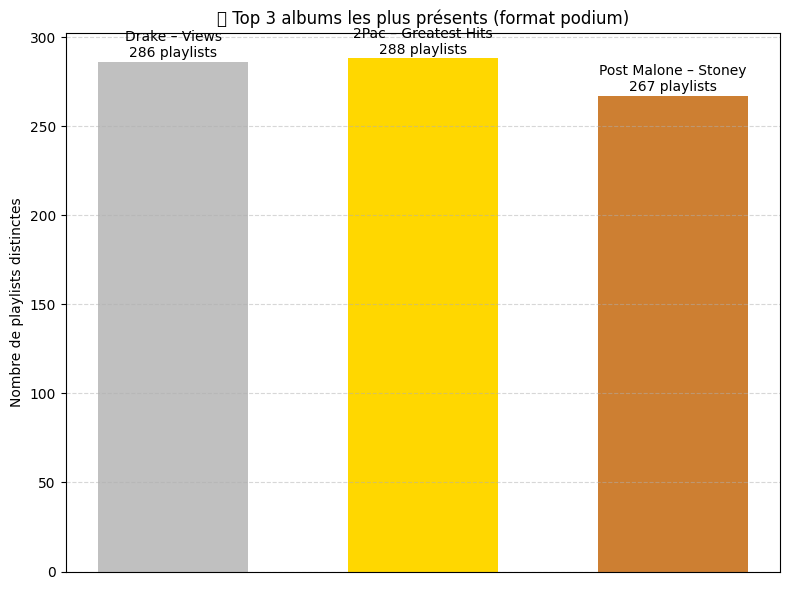

In [36]:
top_albums = df_3000.groupby('album_name')['pid'].nunique().sort_values(ascending=False).head(3)
top_album_names = top_albums.index.tolist()

album_artist_map = (
    df[df['album_name'].isin(top_album_names)]
    .groupby('album_name')['artist_name']
    .agg(lambda x: x.mode().iloc[0])  # artiste le plus fr√©quent pour l‚Äôalbum
)
album_labels = [f"{album_artist_map[album]} ‚Äì {album}" for album in top_album_names]

# Donn√©es du podium
scores = top_albums.values
labels = album_labels

# Positions x du podium
positions = [1, 0, 2]  # index 0 = 1er au centre, 1 = 2e √† gauche, 2 = 3e √† droite
heights = [scores[0], scores[1], scores[2]]

# Couleurs personnalis√©es (or, argent, bronze)
colors = ['#FFD700', '#C0C0C0', '#cd7f32']

plt.figure(figsize=(8, 6))
bars = plt.bar(positions, heights, width=0.6, color=colors)

# Ajout des annotations (valeurs et libell√©s)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{labels[i]}\n{int(scores[i])} playlists",
             ha='center', va='bottom', fontsize=10)

# Personnalisation
plt.xticks([])
plt.ylabel("Nombre de playlists distinctes")
plt.title("üèÜ Top 3 albums les plus pr√©sents (format podium)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2022604073.py:29: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/matylo/.pyenv/versions/my_ml_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


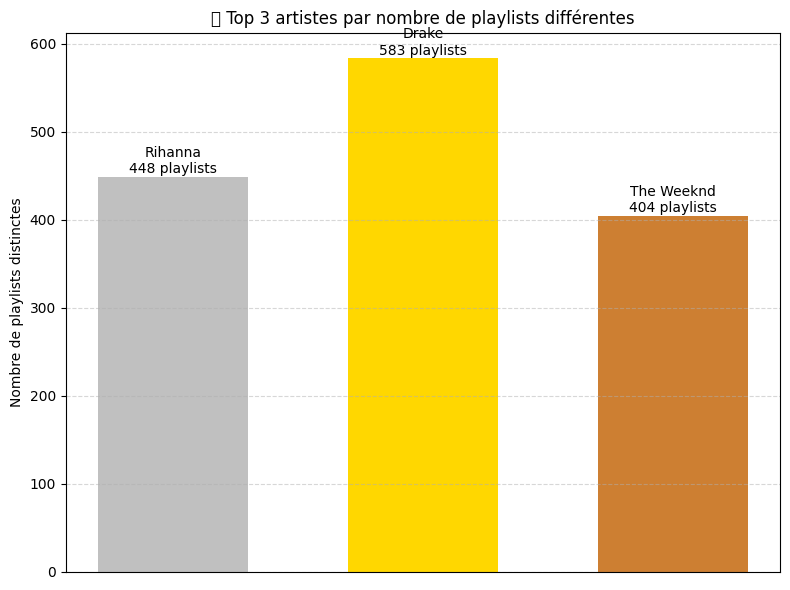

In [30]:
# Nombre de playlists diff√©rentes par artiste
artist_playlist_counts = df_3000.groupby('artist_name')['pid'].nunique().sort_values(ascending=False).head(3)

# Donn√©es du podium
scores = artist_playlist_counts.values
labels = artist_playlist_counts.index

# Positions x du podium
positions = [1, 0, 2]  # index 0 = 1er au centre, 1 = 2e √† gauche, 2 = 3e √† droite
heights = [scores[0], scores[1], scores[2]]

# Couleurs personnalis√©es (or, argent, bronze)
colors = ['#FFD700', '#C0C0C0', '#cd7f32']

plt.figure(figsize=(8, 6))
bars = plt.bar(positions, heights, width=0.6, color=colors)

# Ajout des annotations (valeurs et libell√©s)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{labels[i]}\n{int(scores[i])} playlists",
             ha='center', va='bottom', fontsize=10)

# Personnalisation
plt.xticks([])
plt.ylabel("Nombre de playlists distinctes")
plt.title("üèÜ Top 3 artistes par nombre de playlists diff√©rentes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

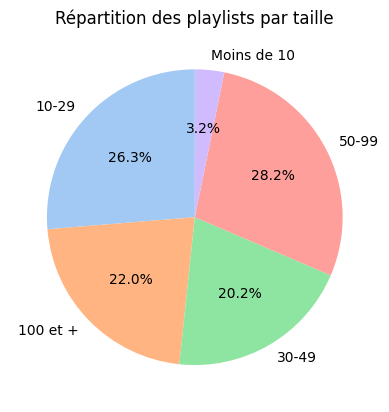

In [32]:
def classify_playlist_size(n):
    if n < 10:
        return 'Moins de 10'
    elif n < 30:
        return '10-29'
    elif n < 50:
        return '30-49'
    elif n < 100:
        return '50-99'
    else:
        return '100 et +'

df_3000['playlist_size'] = df_3000.groupby('pid')['track_uri'].transform('count')
playlist_size_class = df_3000[['pid', 'playlist_size']].drop_duplicates()
playlist_size_class['taille_cat'] = playlist_size_class['playlist_size'].apply(classify_playlist_size)

# Camembert
size_counts = playlist_size_class['taille_cat'].value_counts().sort_index()
size_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("R√©partition des playlists par taille")
plt.ylabel('')
plt.show()

/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2904518917.py:17: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/matylo/.pyenv/versions/my_ml_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


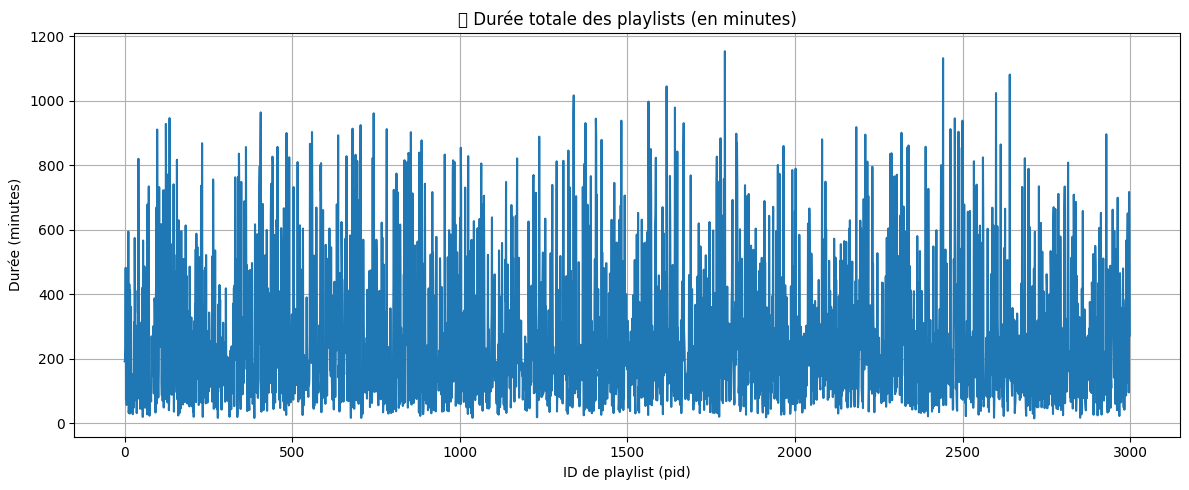

In [33]:
# 1. Dur√©e totale par playlist
duration_per_playlist = df_3000.groupby('pid')['track_duration_ms'].sum().reset_index()

# 2. Conversion en minutes
duration_per_playlist['duration_minutes'] = duration_per_playlist['track_duration_ms'] / 60000

# 3. Tri des playlists par ID ou dur√©e
duration_per_playlist = duration_per_playlist.sort_values('pid')  # ou .sort_values('duration_minutes')

# 4. Diagramme en ligne
plt.figure(figsize=(12, 5))
sns.lineplot(data=duration_per_playlist, x='pid', y='duration_minutes')
plt.title("‚è±Ô∏è Dur√©e totale des playlists (en minutes)")
plt.xlabel("ID de playlist (pid)")
plt.ylabel("Dur√©e (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()